# Welcome to Big Data!!!

## Today we are going to analyze Rainfall data from central Park to get you started

### We are going to do this all in iPython.  This will take some getting used to. You actually do your programming in a window in a web browser or in a program.  But we will teach you all you need to do.  Make sure to type everything you see correctly. All syntax matters including capital letters and punctuation. 

Ok, Lets get you started.  But make sure you read the syllabus and get a binder to keep the handouts.  You need to do the code.org for next class!

We are going to use [Anaconda python](http://continuum.io/).    We might also use [Enthought Canopy](https://www.enthought.com/products/canopy/). they are both good.  

Look on the course site for directions to open Anaconda and then you can move around directories.  Remember nothing gets saved on these computers. so whatever you save each day you need to email to yourself or save some home

Now we are in iPython!!!! 

You see that I am using Markdown to add these notes. You make markdown by choosing Markdown above you can change from code to Markdown.  Notes are essential to understanding everything.  Please make a new cell and add some notes!  We will do more of this later.  If you downloard the notebook from Courseworks under syllabus you can double click on the notes and see how I added links!  I will show you how to add equations and images later!  

But we wanted to analyze precipitation data from Central Park. What questions could we ask and answer?  I have downloaded the data from 1876 onward!  I want to know the was precipiation in the month I was born?  I want to know the annual average precipiation in Central Park and I also want to know what monthly Precipitation looks like.   Lets see if we can figure that out today.  We are going to dive in really deep the first class and show you the power of programming.  Then over the course of the semester I will teach you how to do this on your own.  So enjoy the first analysis, see what we can do and then work on learning it yourself during the semester.

The first thing we will do is import tha python libraries that we will use.  When programming you don't use the whole Python programming language.  You have a basic part of Python that is always turned-on but also you import or turn on the parts of the language that you will use for your analysis.  You will learn about different libraries as the semester progresses.  

Type in what you see below.  Then to execute the code hit shift-enter.  The little circle will fill in on the top right as the computer computes code.  

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib # for plot data
import matplotlib.pylab as plt


Now we need to get our data.  I will use github a lot this semester. It is a website that allows you to update and share code and to keep track of it.  It is like Dropbox on steroids.  The information for this class is at this webside. 

https://github.com/bmaillou/BigDataPython

follow the link to central park csv file. Then click on it and look at the raw data.  csv files are a great way of getting data. csv means commas seperated variables.  It is just a text file with data seperated by commas.  now copy the link so we can add it below.  The link goes to the url. Then we are using the pandas reader to get the data.  We are then indexing by Date to organize.

In [2]:
url='https://raw.githubusercontent.com/bmaillou/BigDataPython/master/central_park.csv'

data1 = pd.read_csv(url,index_col='DATE',parse_dates=['DATE']) #This is central park data

Now the data is in the computer as Data1.  You could just type Data1 to see it. I typed data1.head() to see the first 5 rows.

In [3]:
data1.head()

,STATION,STATION_NAME,PRCP,TOBS
DATE,,,,
1876-01-01 00:00:00,GHCND:USW00094728,NEW YORK CENTRAL PARK OBS BELVEDERE TOWER NY US,0,106
1876-01-02 00:00:00,GHCND:USW00094728,NEW YORK CENTRAL PARK OBS BELVEDERE TOWER NY US,18,139
1876-01-03 00:00:00,GHCND:USW00094728,NEW YORK CENTRAL PARK OBS BELVEDERE TOWER NY US,0,100
1876-01-04 00:00:00,GHCND:USW00094728,NEW YORK CENTRAL PARK OBS BELVEDERE TOWER NY US,0,6
1876-01-05 00:00:00,GHCND:USW00094728,NEW YORK CENTRAL PARK OBS BELVEDERE TOWER NY US,0,6


You can do a lot with the data.  For some quick ideas type data1. with the period and hit tab. The list of functions comes up.

But lets make a quick and dirty plot.  To plot all the data you type data1.plot() and then to show the plot you type plt.show()

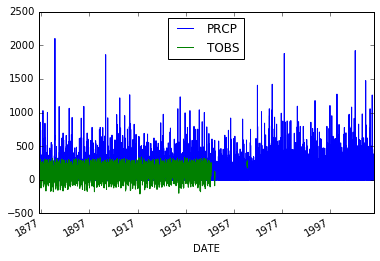

In [4]:
data1.plot()
plt.show()

I want to know what type of data I have.  So i need to check the data type,  show how to type data1.  Hit tab and then see what we can do.  

In [5]:
data1.dtypes

STATION          object
STATION_NAME     object
PRCP            float64
TOBS            float64
dtype: object

We are only interested in precipitation today.  So lets just plot it. We can subchoose just that column.  

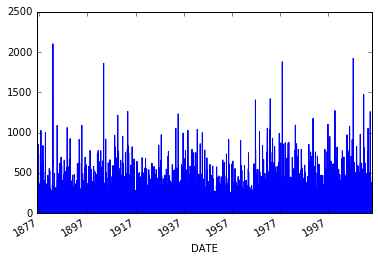

In [6]:
data1['PRCP'].plot()

We can use describe to look at the description of the data.

In [7]:
data1.describe()

,PRCP,TOBS
count,50596.000000,25882.000000
mean,31.572773,119.081562
std,89.699235,98.968277
min,0.000000,-211.000000
25%,0.000000,39.000000
50%,0.000000,122.000000
75%,13.000000,206.000000
max,2103.000000,339.000000


Can you just show the describe for Precitation?

count    50596.000000
mean        31.572773
std         89.699235
min          0.000000
25%          0.000000
50%          0.000000
75%         13.000000
max       2103.000000
Name: PRCP, dtype: float64

what are the units?  
we can plot in inches
I looked it up and the data is in  10 mm.  
1mm =.0393 inches

Plus I am changing how I call the PRCP column. I am using the . notation.  

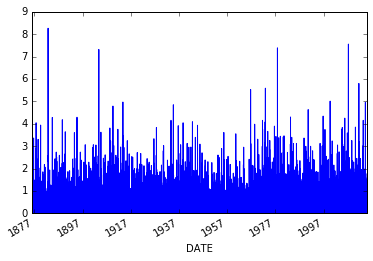

In [8]:
(data1.PRCP/10.0*.0393).plot()  #we are doing the math and plotting at the same time!

lets convert to inches so we can save it forever!

In [9]:
data1.PRCP=(data1.PRCP/10.0*.0393)

Check and make sure it worked using describe. Does the data make sense? 

count    50596.000000
mean         0.124081
std          0.352518
min          0.000000
25%          0.000000
50%          0.000000
75%          0.051090
max          8.264790
Name: PRCP, dtype: float64

can we just get yearly rainfall?  We can resample the data and sum all the rainfall for each year! 

In [10]:
data1['PRCP'].resample('A',how='sum')  #This just gave us yearly rainfall!

DATE
1876-12-31 00:00:00    41.71695
1877-12-31 00:00:00    40.14888
1878-12-31 00:00:00    48.60231
1879-12-31 00:00:00    39.00132
1880-12-31 00:00:00    36.59616
1881-12-31 00:00:00    35.53506
1882-12-31 00:00:00    45.24216
1883-12-31 00:00:00    35.73156
1884-12-31 00:00:00    51.98211
1885-12-31 00:00:00    35.35428
1886-12-31 00:00:00    39.32751
1887-12-31 00:00:00    43.94526
1888-12-31 00:00:00    53.23971
1889-12-31 00:00:00    58.10112
1890-12-31 00:00:00    45.59586
1891-12-31 00:00:00    39.50043
1892-12-31 00:00:00    35.39358
1893-12-31 00:00:00    48.18966
1894-12-31 00:00:00    40.37682
1895-12-31 00:00:00    35.32677
1896-12-31 00:00:00    41.90952
1897-12-31 00:00:00    44.47581
1898-12-31 00:00:00    47.85954
1899-12-31 00:00:00    38.52972
1900-12-31             41.13924
1901-12-31             47.85954
1902-12-31             52.69344
1903-12-31             57.96357
1904-12-31             41.58726
1905-12-31             37.40574
                         ...   
198

Now we could plot the yearly data!

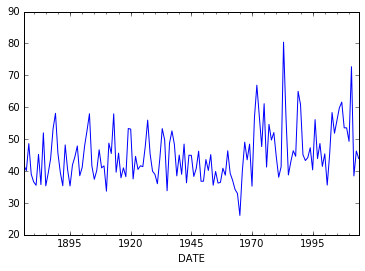

In [11]:
data1['PRCP'].resample('A',how='sum').plot()

We could also make it a scatter plot with points and no line.  This is the power of plotting with matplotlib. You can change anything! 

go to http://matplotlib.org/1.3.1/examples/pylab_examples/filledmarker_demo.html
and choose your own color and style.  if you want to turn the line off do linestyle='none'

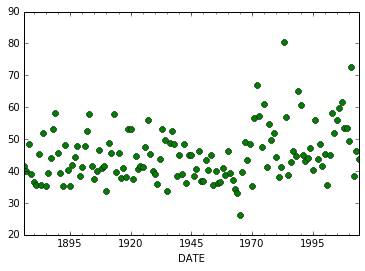

In [12]:
data1['PRCP'].resample('A',how='sum').plot(marker='8',color='g',linestyle='none')

Can you use describe to give statistics on the annual data? How much rain fell on the wettest year?

count    139.000000
mean      45.165483
std        8.389918
min       26.075550
25%       39.144765
50%       43.945260
75%       48.735930
max       80.423520
Name: PRCP, dtype: float64

What if we only want to plot some of the data?  Lets plot from 1900 to 1920...

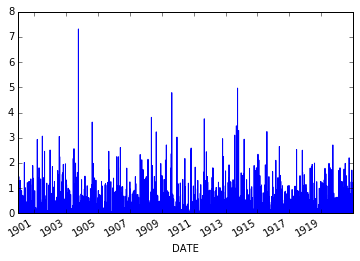

In [13]:
data1.PRCP['1900':'1920'].plot()

or for just one year


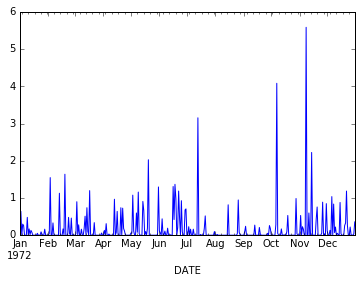

In [14]:
data1.PRCP['1972'].plot()

or one month!

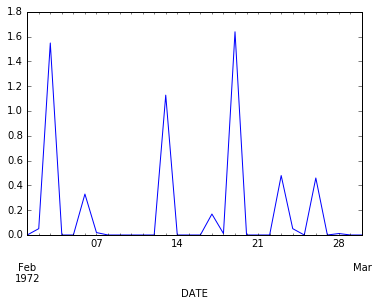

In [15]:
data1.PRCP['02/01/1972':'03/01/1972'].plot()

Can you plot for the month and or year you were born?

Now we are going to do some big changes. (I am also showing you here that you can do bullets in the Markdown)
### My end point is to look at the monthly data in boxplots. 
- But to get there we need to resample to monthly. 
- Then we need to make a new column that lists the months. 
- Then we can make a boxplot!   

So lets start by making a new dataframe which is the data resampled by summing the monthly data. 



In [16]:
data_month=data1.resample('M',how='sum')

Now we can describe the data

In [17]:
data_month.describe()

,PRCP,TOBS
count,1667.000000,852.000000
mean,3.766048,3617.451878
std,2.141284,2772.965507
min,0.023580,-1886.000000
25%,2.295120,986.500000
50%,3.411240,3652.000000
75%,4.782810,6263.000000
max,18.915090,8259.000000


So things appear to be working.  What does our data look like?

In [18]:
print data_month

                         PRCP  TOBS
DATE                               
1876-01-31 00:00:00   0.94320   780
1876-02-29 00:00:00   4.80246    72
1876-03-31 00:00:00   8.77569   499
1876-04-30 00:00:00   3.05754  2578
1876-05-31 00:00:00   3.02217  4889
1876-06-30 00:00:00   2.65668  6989
1876-07-31 00:00:00   3.64311  8172
1876-08-31 00:00:00   2.27547  7495
1876-09-30 00:00:00   5.27013  5348
1876-10-31 00:00:00   1.41873  3289
1876-11-30 00:00:00   3.31299  2222
1876-12-31 00:00:00   2.53878 -1159
1877-01-31 00:00:00   2.61738  -707
1877-02-28 00:00:00   1.24188   813
1877-03-31 00:00:00   5.56488   740
1877-04-30 00:00:00   2.72742  2700
1877-05-31 00:00:00   0.95106  4779
1877-06-30 00:00:00   2.79816  6396
1877-07-31 00:00:00   5.72208  7473
1877-08-31 00:00:00   2.76672  7516
1877-09-30 00:00:00   1.32834  5880
1877-10-31 00:00:00   8.13117  4163
1877-11-30 00:00:00   5.61990  2048
1877-12-31 00:00:00   0.67989   987
1878-01-31 00:00:00   4.46055  -315
1878-02-28 00:00:00   3.7452

To make our plotting work we will need a new column that tells us just the month. So we are going to look at the index date and pull out the month and put it into a new column. 

In [19]:
data_month['month']=data_month.index.month

lets just look at 5 rows and see if it worked.  

In [21]:
data_month.head()  #head just gives you the first 5

,PRCP,TOBS,month
DATE,,,
1876-01-31 00:00:00,0.94320,780,1
1876-02-29 00:00:00,4.80246,72,2
1876-03-31 00:00:00,8.77569,499,3
1876-04-30 00:00:00,3.05754,2578,4
1876-05-31 00:00:00,3.02217,4889,5


Now lets make our boxplot!  you can google pandas boxplot to see how.  http://pandas.pydata.org/pandas-docs/stable/visualization.html  

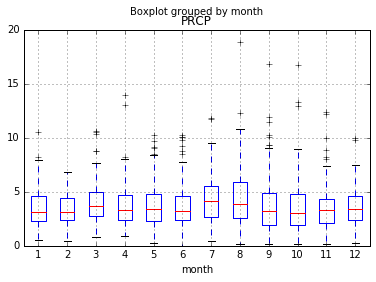

In [22]:
data_month.boxplot(column=['PRCP'],by='month')

I talk about making figure captions in the homework.  So lets make one here.

Figure 1.  Boxplot of monthly precipitation Central Park, New York City from 1876 to 2015.  


We will also need to learn about how to talk about results.  We can see from the figure that precipitation does not systematically vary by month in Central Park and that the mean monthly precipitation is fairly uniform.  

to get the monthly data we can groupby month and the describe the data.  or just look at the mean. We will also only look at prcp.  As you can see rain is pretty uniform by month in NYC!

In [23]:
data_month.groupby('month').PRCP.mean()


month
1     3.463263
2     3.334789
3     3.995651
4     3.697536
5     3.755582
6     3.674013
7     4.253052
8     4.348163
9     3.870993
10    3.646531
11    3.527670
12    3.624314
Name: PRCP, dtype: float64

I hope you got some of these to work and are excited about what we can do.  You just analyzed 50,000 precipitation data points on your first day!  We are ready to begin learning data analysis and Python!